# Анализ психотипа по профилю социальной сети Вконтакте. # 

Тестовое задание на вакансию 
"Data scientist (Аналитик данных)"
Жарикова Алексея

Данный для выполнения задания получен путем парсинга страниц около 10 тысяч пользователей социальной сети Вконтакте. В ней содержится обезличенная информация о пользователях этого ресурса.
Центральная задача – описательная статистика базы данных. Дополнительные задачи: продемонстрировать работу методов классификации, кластеризации и др.

До начала каких либо работ, неоходимо выгрузить данные для работы и ознакомится с ними.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
import io
import requests
%matplotlib inline
#Опции для вывода данных
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Следующие действия подгружают в память из файла data.csv данные выданные для анализа 

In [2]:
data = pd.read_csv('data.csv', sep = ';', engine = 'python', encoding='utf-8')

Можно наглядно увидеть, как данные представляются в текущей среде Jupiter Python

In [3]:

data

,№,наличие фотоальбомов,наличие фото,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,наличие аватара,наличие аудио,количество аудио,наличие интересных страниц,количество интересных страниц,наличие видео,количество видео,количество комментариев к видео,количество репостов видео,количество друзей,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,пол,статус,родной город,семейное положение,языки,телефон,доп. телефон,деятельность,интересы,любимые музыка,любимые фильмы,любимые тв-передачи,любимые игры,любимые цитаты,о себе,среднее образование,высшее образование,место работы,адрес работы,год начала работы,год окончания работы,должность,количество мест работы,армия,политические взгляды,мировоззрение,главное в жизни,главное в людях,отношение к курению,отношение к алкоголю,вдохновляют,психотип
0,1,0,1,0,20,1171.0,56.0,0.0,NaN,97.0,1,0,NaN,1,24.0,1,14.0,5.0,0.0,283,513,192.0,30.0,795.0,45.0,17814.0,NaN,NaN,15.0,женский,нашедшая чудо,Казань,женат/замужем,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Делай добро и кидай его в море. Я объявляю вам...,NaN,"Россия, Казань, Гимназия №139, класс б, направ...","Россия, Казань, КГУ им. Ульянова-Ленина , Инст...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Православие,NaN,NaN,NaN,NaN,NaN,5
1,2,1,1,6,1301,13276.0,1605.0,133.0,4.0,523.0,1,0,NaN,1,283.0,1,595.0,4819.0,21898.0,1930,4304,2761.0,3137.0,23707.0,0.0,164849.0,0.0,52.0,NaN,женский,"Рассказываю истории. Иногда лучше, чем люди, с...",Горький-Нижний Новгород,женат/замужем,"Русский,English,Deutsch",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,&quot;Красота - это лучшая проповедь&quot; ***...,О себе вслух не говорят :),"Россия, Нижний Новгород, Школа №110, класс ж, ...","Россия, Нижний Новгород, ННГУ им. Лобачевского...",Журнал &quot;Русский Мир&quot;,Москва,2010.0,NaN,корреспондент от Нижегородского региона,7.0,NaN,NaN,"Бог един, религии придумали люди",NaN,NaN,резко негативное,резко негативное,Медитация. Музыка. Слова. Природа. Доброта чел...,8
2,3,1,1,1,236,3722.0,236.0,0.0,0.0,164.0,1,0,NaN,1,64.0,1,510.0,6402.0,7075.0,156,664,17.0,0.0,69.0,0.0,1626.0,NaN,NaN,NaN,женский,"люди, сады, люди, статуи",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,4,1,1,6,997,1093.0,988.0,9.0,4.0,997.0,1,1,718.0,1,31.0,1,284.0,172.0,56.0,300,236,482.0,50.0,922.0,0.0,8380.0,NaN,NaN,24.0,женский,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,5,0,1,0,80,3768.0,216.0,9.0,NaN,157.0,1,0,NaN,1,10.0,1,119.0,3375.0,4039.0,291,368,713.0,184.0,7580.0,0.0,36812.0,NaN,NaN,NaN,женский,"Тот, у кого в душе светит солнце, будет видеть...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,6,1,1,4,605,866.0,225.0,0.0,2.0,605.0,1,1,1094.0,1,51.0,1,226.0,339.0,50.0,186,274,431.0,114.0,875.0,0.0,15231.0,0.0,11.0,22.0,женский,"&quot;Любовь отвергнута, Душа уволена, Ничто н...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,7,0,1,0,85,941.0,142.0,2.0,NaN,85.0,1,1,117.0,1,34.0,1,112.0,351.0,1096.0,425,90,473.0,87.0,1625.0,0.0,30451.0,NaN,NaN,5.0,мужской,"Созидание - это то, ради чего стоит прожить жизнь",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,8,1,1,2,341,3259.0,414.0,5.0,1.0,340.0,1,1,139.0,1,61.0,1,101.0,66.0,192.0,368,196,2112.0,294.0,6570.0,0.0,49458.0,NaN,NaN,47.0,женский,"Время, СТОЙ!!!!!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Данные имеют представляют из себя матрицу размеров 

In [4]:
print(data.shape)

(9199, 61)


Проведя первичный осмотр данных видно, что столбец "№" не имеет смысла для дальнейшего анализа, так как у нас есть обычная индексация предоставляемая средой, тем более она где-то разъехалась (см. последнюю строчку 9198	10341)
Также уберем столбец "год окончания работы", он полностью пустой и не скажется на анализе

In [5]:
data = data.drop(columns = ['№','год окончания работы'])

Выведем актуальный размер данных

In [6]:

print(data.shape)

(9199, 59)


Необходимо ознакомится с типами данных, которые будут нам встречать в данной базе данных.
посмотрим общую информацию по набору

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 59 columns):
наличие фотоальбомов                           9199 non-null int64
наличие фото                                   9199 non-null int64
количество фотоальбомов                        9199 non-null int64
количество фото                                9199 non-null int64
количество лайков на фото                      8898 non-null float64
количество комментариев к фото                 8898 non-null float64
количество репостов фото                       8898 non-null float64
количество описаний фотоальбомов               4694 non-null float64
количество описаний фото                       8898 non-null float64
наличие аватара                                9199 non-null int64
наличие аудио                                  9199 non-null int64
количество аудио                               3714 non-null float64
наличие интересных страниц                     9199 non-null int64
количество

Оценим основные статистические характеристики данных по каждому числовому признаку

In [8]:
data.describe()

,наличие фотоальбомов,наличие фото,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,наличие аватара,наличие аудио,количество аудио,наличие интересных страниц,количество интересных страниц,наличие видео,количество видео,количество комментариев к видео,количество репостов видео,количество друзей,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,год начала работы,количество мест работы,психотип
count,9199.000000,9199.000000,9199.000000,9199.000000,8898.000000,8898.000000,8898.000000,4694.000000,8898.000000,9199.000000,9199.000000,3714.000000,9199.000000,9019.000000,9199.000000,7940.000000,7940.000000,7940.000000,9199.000000,9199.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,1716.000000,1716.000000,4097.000000,308.000000,651.000000,9199.000000
mean,0.510273,0.967279,2.125992,163.035439,1412.286469,110.442909,2.578445,1.541116,250.599461,0.960322,0.403740,626.382876,0.980433,127.447611,0.863137,243.155919,11729.261083,16099.313854,174.082618,179.721926,679.856535,59.135242,1440.058884,50.882232,10689.247577,50.604312,78.084499,48.017818,2012.064935,1.499232,6.497554
std,0.499922,0.177915,5.903855,727.407923,2869.529373,291.053312,15.119054,3.516833,835.481724,0.195213,0.490673,895.496427,0.138516,165.927999,0.343721,557.382410,35348.900262,41776.424333,377.755321,402.916853,2276.242036,213.593233,3331.130959,344.551930,24676.840280,190.460538,183.208799,82.842918,8.053304,1.131880,2.690243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1941.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,7.000000,113.000000,2.000000,0.000000,0.000000,5.000000,1.000000,0.000000,106.000000,1.000000,38.000000,1.000000,15.000000,112.000000,176.000000,52.000000,32.000000,13.000000,1.000000,69.250000,0.000000,1061.000000,0.000000,3.000000,4.000000,2010.000000,1.000000,4.000000
50%,1.000000,1.000000,1.000000,32.000000,486.000000,20.000000,0.000000,1.000000,40.000000,1.000000,0.000000,337.000000,1.000000,81.000000,1.000000,67.000000,1594.000000,2365.500000,104.000000,98.000000,93.000000,7.000000,351.000000,0.000000,3906.500000,3.000000,14.000000,22.000000,2014.000000,1.000000,7.000000
75%,1.000000,1.000000,2.000000,123.000000,1494.750000,95.000000,1.000000,2.000000,164.000000,1.000000,1.000000,776.750000,1.000000,157.000000,1.000000,231.000000,8660.500000,12215.250000,188.000000,208.000000,480.000000,37.000000,1374.750000,3.000000,10728.000000,24.000000,69.000000,62.000000,2016.000000,1.000000,9.000000
max,1.000000,1.000000,206.000000,40860.000000,79267.000000,6677.000000,594.000000,68.000000,13652.000000,1.000000,1.000000,10000.000000,1.000000,2831.000000,1.000000,9572.000000,695359.000000,453482.000000,9805.000000,22529.000000,71564.000000,6090.000000,65384.000000,11203.000000,701396.000000,3457.000000,2466.000000,1868.000000,2018.000000,7.000000,10.000000


Также можем оценить некоторые возможные показатели и для нечисловых признаков 

In [9]:
data.describe(include=['object', 'bool'])

,пол,статус,родной город,семейное положение,языки,телефон,доп. телефон,деятельность,интересы,любимые музыка,любимые фильмы,любимые тв-передачи,любимые игры,любимые цитаты,о себе,среднее образование,высшее образование,место работы,адрес работы,должность,армия,политические взгляды,мировоззрение,главное в жизни,главное в людях,отношение к курению,отношение к алкоголю,вдохновляют
count,9199,4139,2318,1512,701,1071,546,456,649,721,700,395,507,684,589,2074,1513,593,546,273,251,904,1123,1203,1244,1264,1244,620
unique,2,3955,1022,487,163,989,393,428,624,665,686,352,480,682,583,2069,1491,576,219,233,250,9,308,8,6,5,5,513
top,женский,...,Москва,не женат/не замужем,"Русский,English",-,нет,-,Футбол,рок,много,нет,-,-,...,"Россия, Москва, Гимназия №1562 им. Артёма Боро...","Россия, Воронеж, ВГПУ",🔔 Эта страница официально подтверждена,Москва,Администратор,не служил,умеренные,Православие,саморазвитие,доброта и честность,нейтральное,нейтральное,Музыка
freq,5542,25,135,402,346,10,39,6,5,9,5,12,5,3,3,2,3,5,69,6,2,358,481,484,593,359,413,46


Для анализа можно добавить несколько вычисляемых столбцов, которые будут возможно пригодны для дальнейшего использования

Добавим столбец характеризующий заполненность анкеты Fullness_profile.
Его суть заключается в том, что проверяем на пустоту значения, свазанные с личной информацией, в таблице.

In [10]:
profile = data.loc[:,['статус', 'родной город', 'семейное положение', 'языки', 'телефон','доп. телефон', 'деятельность', 'интересы', 'любимые музыка', 'любимые фильмы', 'любимые тв-передачи', 'любимые игры', 'любимые цитаты', 'о себе', 'среднее образование', 'высшее образование', 'место работы', 'адрес работы', 'год начала работы', 'должность', 'количество мест работы', 'армия', 'политические взгляды', 'мировоззрение', 'главное в жизни', 'главное в людях', 'отношение к курению', 'отношение к алкоголю', 'вдохновляют']]
#Столбец заполненности анкеты (взяли столбцы и проверили сколько из столбцов не пустота и делим на количество этих столбцов)
tmp = profile.apply(lambda x: sum(x.isnull().values)/(profile.shape[1]/100), axis = 1)
#Добавляем в основной сет 
data.insert(29, "Fullness_profile", tmp, True) 


"Семейное положение" можно заменить на цифровые значения, посмотрим как выглядит этот столбец

не указано = 0 
в активном поиске = 1
не женат/не замужем = 2
женат/замужем = 3
влюблён/влюблена = 4
есть друг/есть подруга = 5
всё сложно = 6
помолвлен/помолвлена = 7 

In [11]:
data['семейное положение'].value_counts

<bound method IndexOpsMixin.value_counts of 0             женат/замужем
1             женат/замужем
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17                      NaN
18                      NaN
19      не женат/не замужем
20                      NaN
21                      NaN
22                      NaN
23                      NaN
24                      NaN
25          (Галина Шухова)
26                      NaN
27                      NaN
28                      NaN
29                      NaN
30                      NaN
31                      NaN
32                      NaN
33                      NaN
34  

In [12]:
marital_status = data['семейное положение']
values = marital_status.values
print(values.shape)
for i in range(values.shape[0]):
    if isinstance(values[i], str):
        if values[i] == 'в активном поиске':
            values[i] = 1
        elif values[i] == 'не женат/не замужем':
            values[i] = 2
        elif 'женат/замужем' in marital_status[i] :
            values[i] = 3
        elif 'влюблён/влюблена' in marital_status[i] :
            values[i] = 4
        elif 'есть друг/есть подруга' in marital_status[i] :
            values[i] = 5
        elif 'всё сложно' in marital_status[i] :
            values[i] = 6
        elif 'помолвлен/помолвлена' in marital_status[i] :
            values[i] = 7
        else: values[i] = 0
    else: values[i] = 0
print(values)
#Добавляем в массив
data.insert(29, "marital_status", values, True) 

(9199,)
[3 3 0 ... 0 0 0]


In [13]:
data.astype({'marital_status': 'int64'}).dtypes

наличие фотоальбомов                             int64
наличие фото                                     int64
количество фотоальбомов                          int64
количество фото                                  int64
количество лайков на фото                      float64
количество комментариев к фото                 float64
количество репостов фото                       float64
количество описаний фотоальбомов               float64
количество описаний фото                       float64
наличие аватара                                  int64
наличие аудио                                    int64
количество аудио                               float64
наличие интересных страниц                       int64
количество интересных страниц                  float64
наличие видео                                    int64
количество видео                               float64
количество комментариев к видео                float64
количество репостов видео                      float64
количество

# Вычисление матриц корреляций с различными предобработками

Мы имеем ряд признаков, которые хотелось бы использовать в дальнейшем для анализа, но в данных есть пропуски и в таблице они указаны как Nan. 

In [14]:
psyhotype = data['психотип'] # Отдельно взяли психотип
data1 = data.drop(columns = ['пол','статус', 'родной город', 'семейное положение', 'языки', 'телефон','доп. телефон', 'деятельность', 'интересы', 'любимые музыка', 'любимые фильмы', 'любимые тв-передачи', 'любимые игры', 'любимые цитаты', 'о себе', 'среднее образование', 'высшее образование', 'место работы', 'адрес работы', 'год начала работы', 'должность', 'количество мест работы', 'армия', 'политические взгляды', 'мировоззрение', 'главное в жизни', 'главное в людях', 'отношение к курению', 'отношение к алкоголю', 'вдохновляют'])
data1 = data1.fillna(0) #Заменили пропуски нулями 
data2 = data1.fillna(data1.mean()) #Заменили пропуски на средние значения по столбцам

Вычислим корелляцию между числовыми признаками при замене на Nan->0 

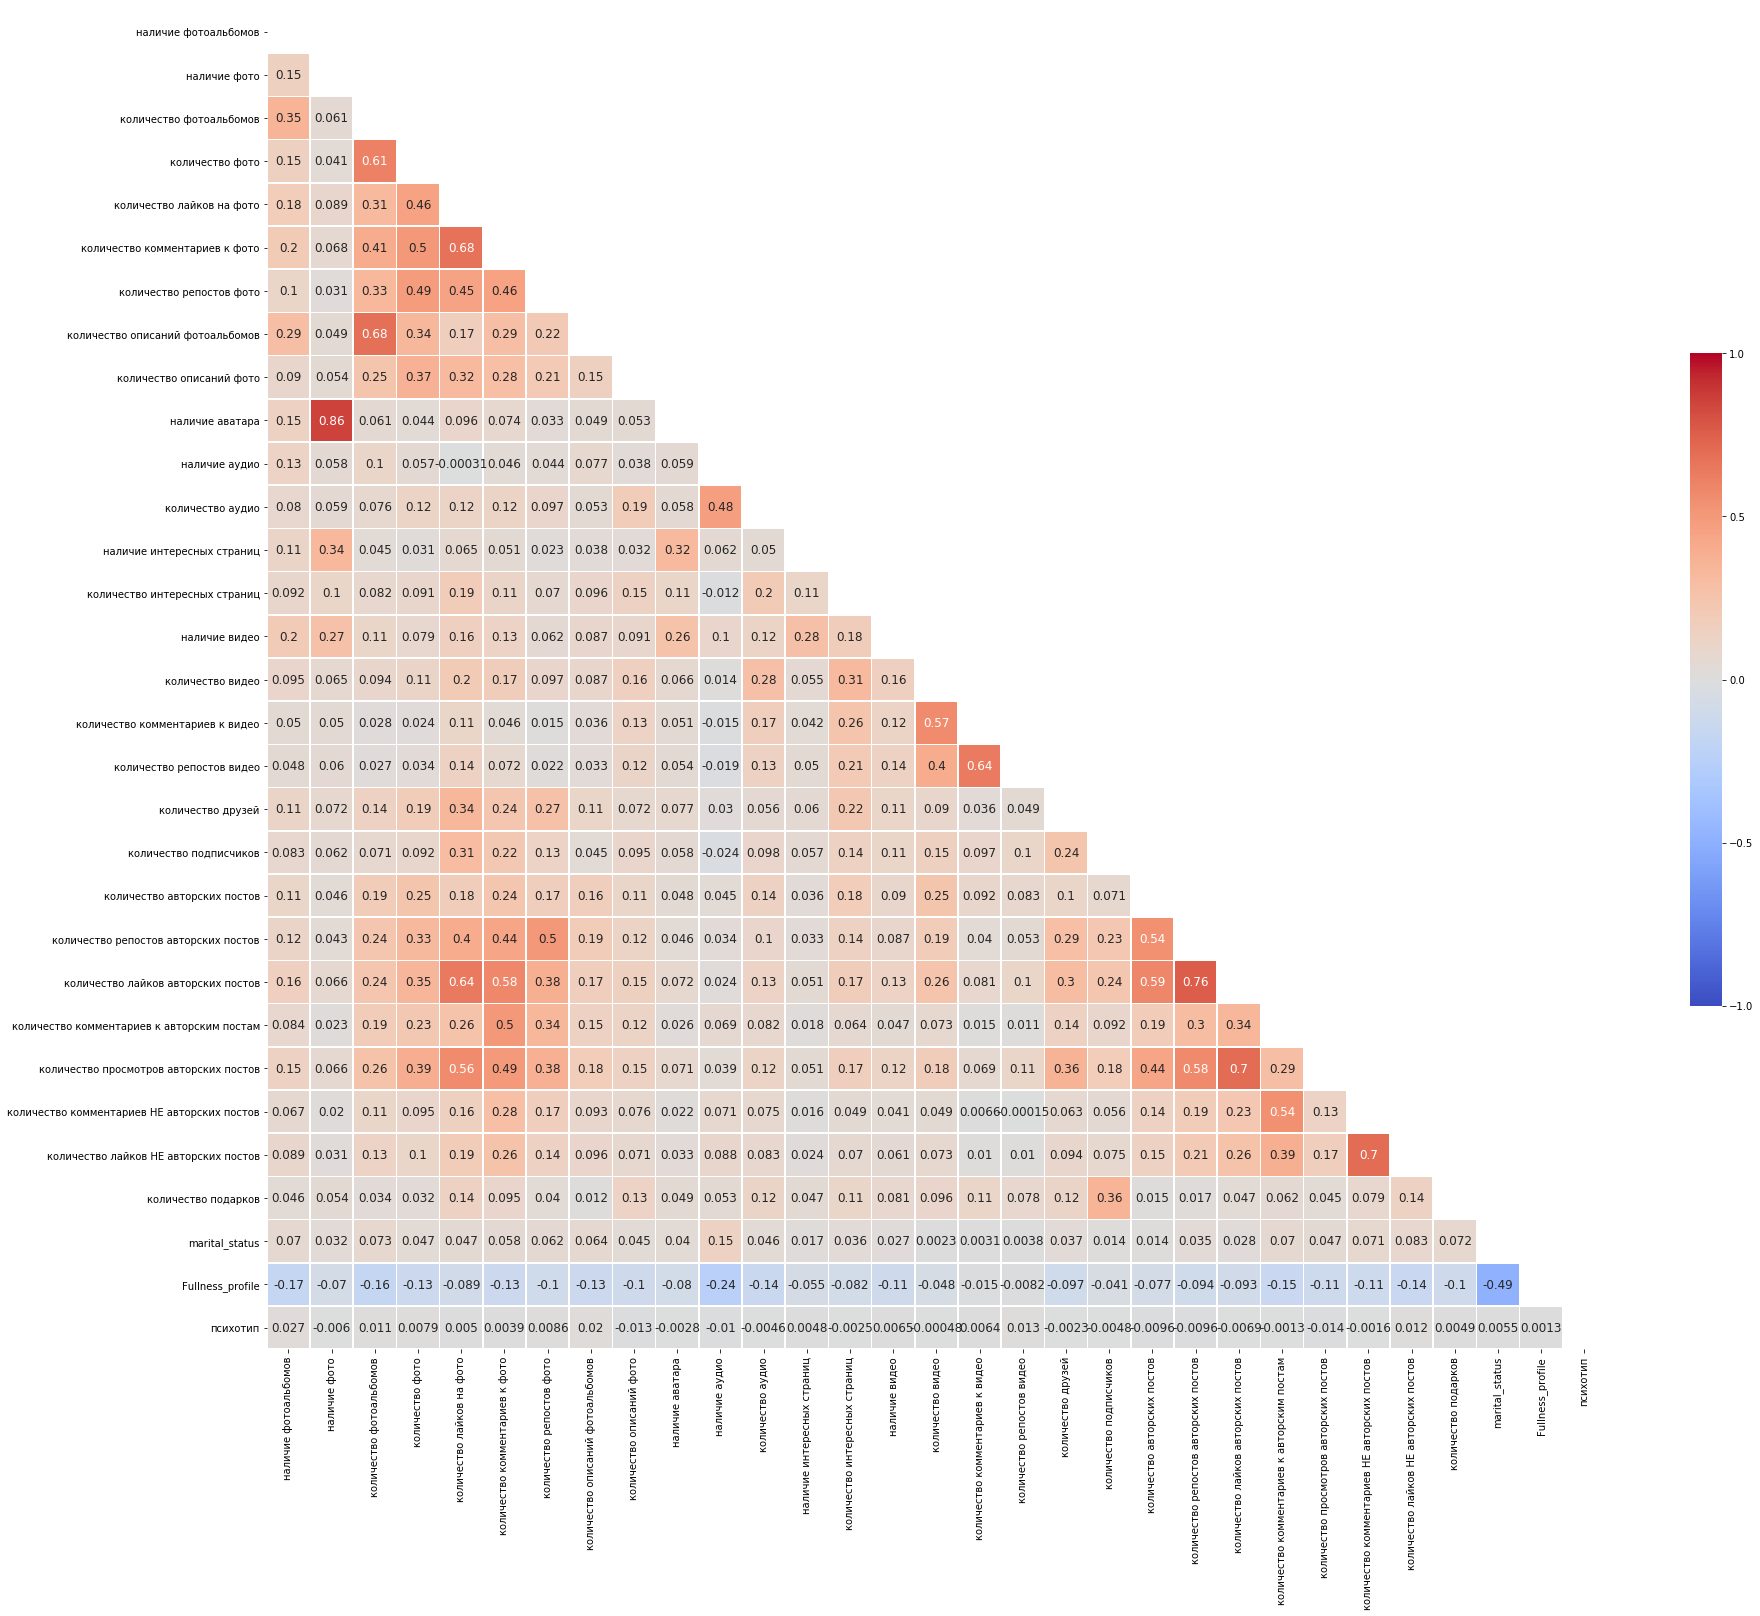

In [15]:
corr = data1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 30)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


Вычислим корелляцию между числовыми признаками при замене на среднее Nan->mean

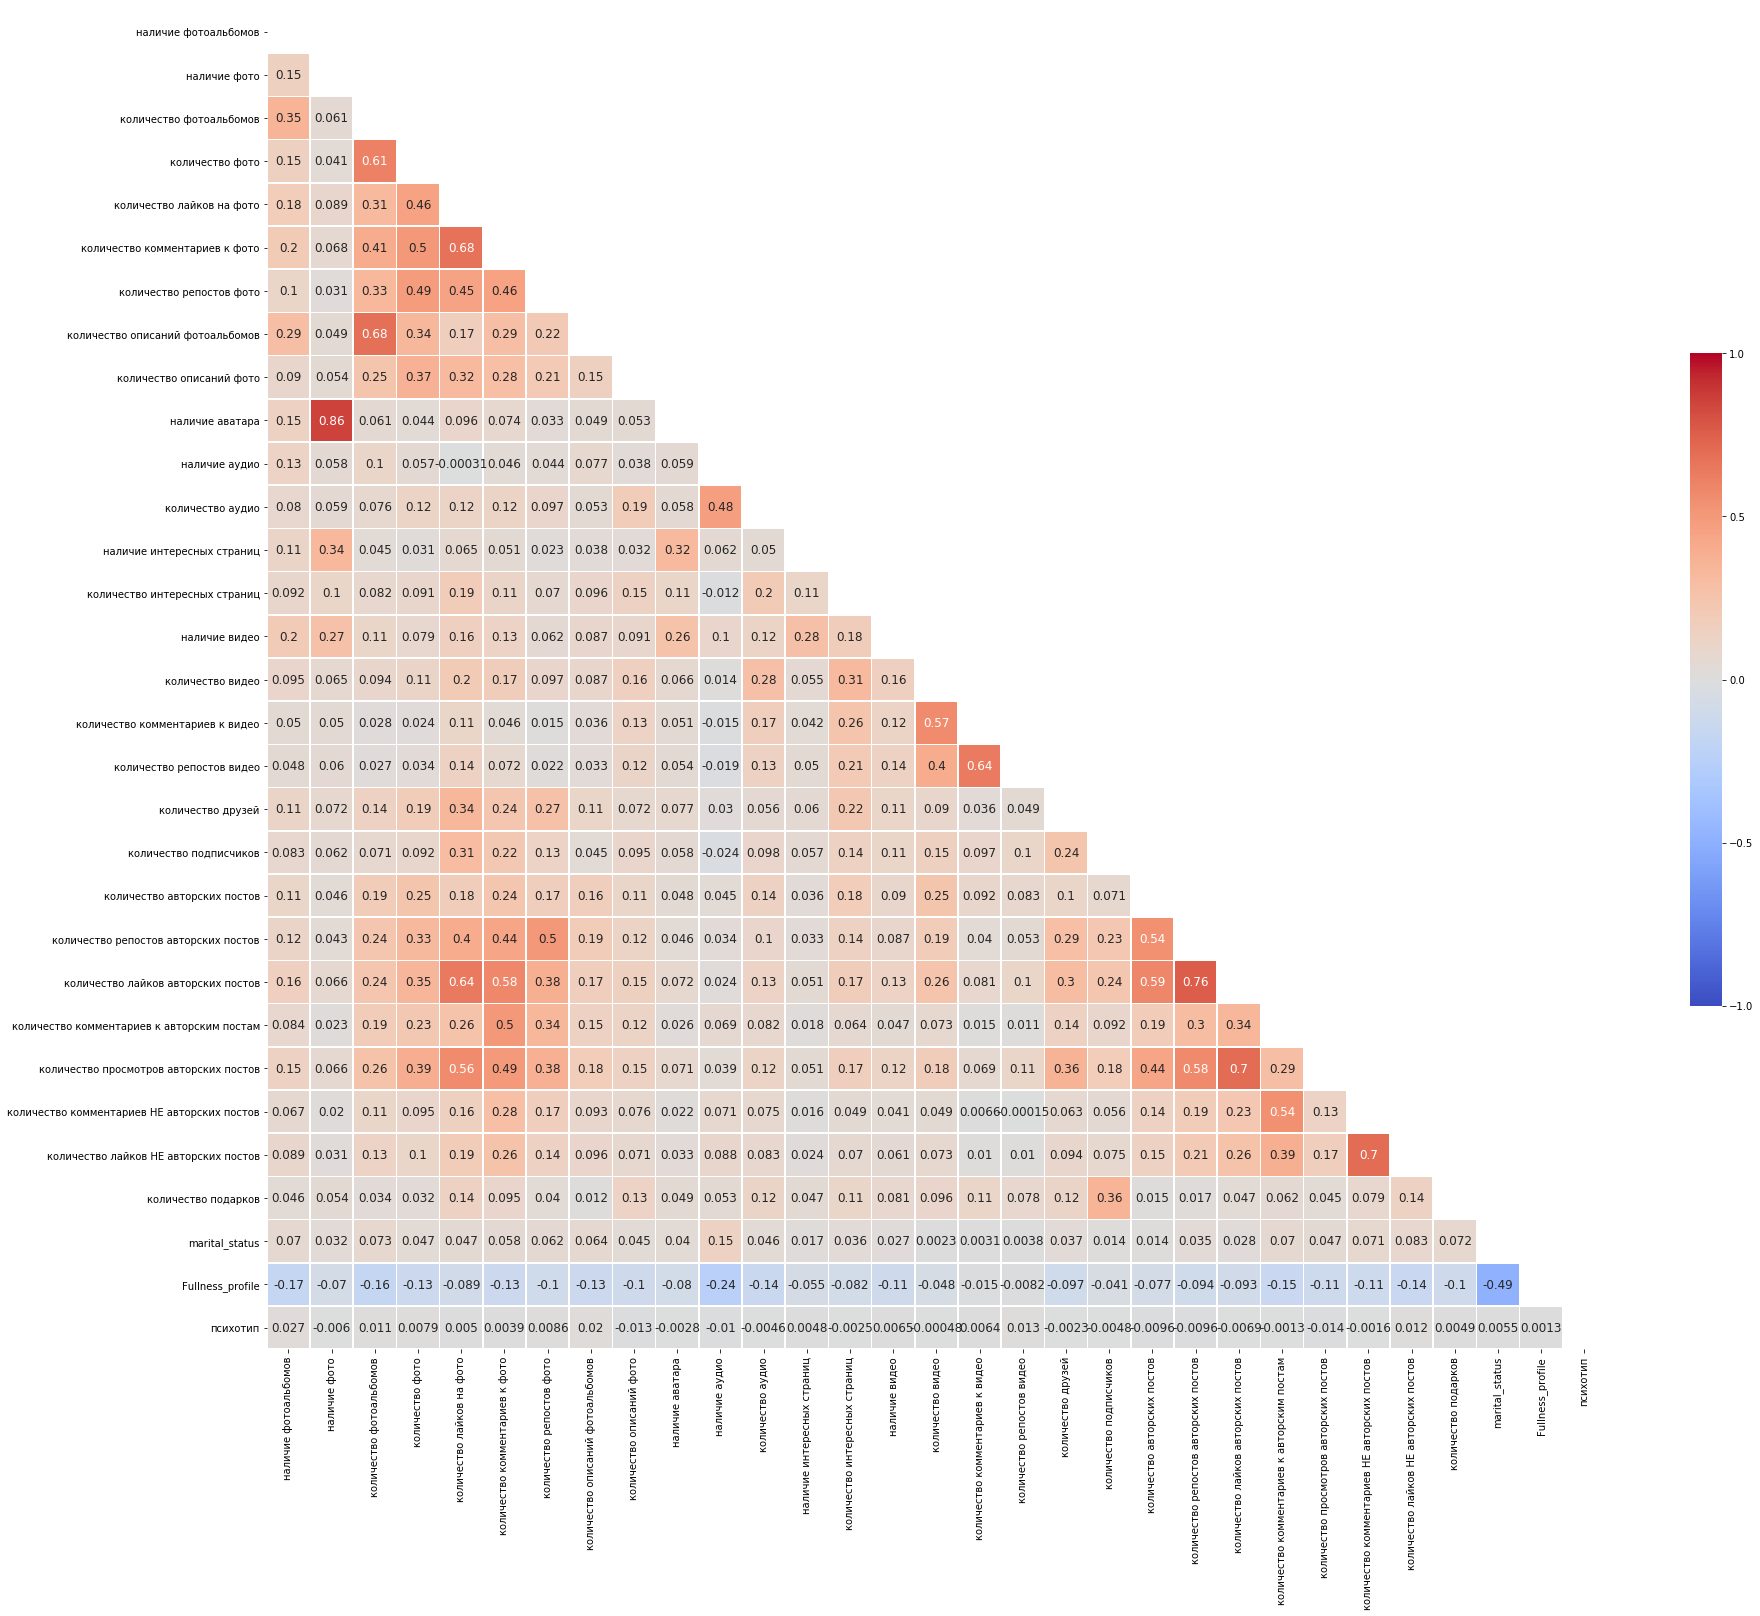

In [16]:
corr = data2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 30)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


# Выводы из матрицы корреляции

Матрица корреляции показывает только линейные зависимости, и можно проследить очевидные закономерности исходя из построенного избражения.  
То есть мы показали ряд очевидных зависимостей через матрицу:
- Наличие фото и наличие аватара коррелируют сильнее всего 
- Количесвто альбомов сильно коррелирует с количеством описаний альбомов
- Количество репостов авторских постов зависит от количества лайков авторский постов и просмотров
- Количество видео и количетво комментариев к видео  
**Не самые очевидные зависимости:**
- количество репостов видео и количество комментариев к видео
- количество просмотров авторских постов и количество лайков на фото

И еще ряд зависимостей, который в целом дублируют выводы.  
Основной задачей в ходе исследования я ставлю предсказания или классификация по психотипу, исходя из данных.  
То есть целевым признаком становитя Психотип.  
По матрице видно, что с данным столбцом ничего линейно не зависит.  

# Строим модель

Ожидаемая модель сводится к построению регрессии.  
Оценку будем производить с помощью коэффициента детерминации

In [33]:
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#from sklearn.cross_validation import train_test_split

models = []
models.append(RandomForestClassifier(n_estimators=165, max_depth=4, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(KNeighborsClassifier(n_neighbors=20))
models.append(GaussianNB())

nameModels=["RandomForestClassifier","GradientBoostingClassifier","KNeighborsClassifier","GaussianNB"]

Целевой признак - психотип, его убираем из выборки

In [18]:
data1.drop(columns=['психотип'])
data2.drop(columns=['психотип'])

,наличие фотоальбомов,наличие фото,количество фотоальбомов,количество фото,количество лайков на фото,количество комментариев к фото,количество репостов фото,количество описаний фотоальбомов,количество описаний фото,наличие аватара,наличие аудио,количество аудио,наличие интересных страниц,количество интересных страниц,наличие видео,количество видео,количество комментариев к видео,количество репостов видео,количество друзей,количество подписчиков,количество авторских постов,количество репостов авторских постов,количество лайков авторских постов,количество комментариев к авторским постам,количество просмотров авторских постов,количество комментариев НЕ авторских постов,количество лайков НЕ авторских постов,количество подарков,marital_status,Fullness_profile
0,0,1,0,20,1171.0,56.0,0.0,0.0,97.0,1,0,0.0,1,24.0,1,14.0,5.0,0.0,283,513,192.0,30.0,795.0,45.0,17814.0,0.0,0.0,15.0,3,75.862069
1,1,1,6,1301,13276.0,1605.0,133.0,4.0,523.0,1,0,0.0,1,283.0,1,595.0,4819.0,21898.0,1930,4304,2761.0,3137.0,23707.0,0.0,164849.0,0.0,52.0,0.0,3,41.379310
2,1,1,1,236,3722.0,236.0,0.0,0.0,164.0,1,0,0.0,1,64.0,1,510.0,6402.0,7075.0,156,664,17.0,0.0,69.0,0.0,1626.0,0.0,0.0,0.0,0,96.551724
3,1,1,6,997,1093.0,988.0,9.0,4.0,997.0,1,1,718.0,1,31.0,1,284.0,172.0,56.0,300,236,482.0,50.0,922.0,0.0,8380.0,0.0,0.0,24.0,0,96.551724
4,0,1,0,80,3768.0,216.0,9.0,0.0,157.0,1,0,0.0,1,10.0,1,119.0,3375.0,4039.0,291,368,713.0,184.0,7580.0,0.0,36812.0,0.0,0.0,0.0,0,96.551724
5,1,1,4,605,866.0,225.0,0.0,2.0,605.0,1,1,1094.0,1,51.0,1,226.0,339.0,50.0,186,274,431.0,114.0,875.0,0.0,15231.0,0.0,11.0,22.0,0,96.551724
6,0,1,0,85,941.0,142.0,2.0,0.0,85.0,1,1,117.0,1,34.0,1,112.0,351.0,1096.0,425,90,473.0,87.0,1625.0,0.0,30451.0,0.0,0.0,5.0,0,96.551724
7,1,1,2,341,3259.0,414.0,5.0,1.0,340.0,1,1,139.0,1,61.0,1,101.0,66.0,192.0,368,196,2112.0,294.0,6570.0,0.0,49458.0,0.0,0.0,47.0,0,96.551724
8,1,1,1,31,384.0,69.0,0.0,1.0,31.0,1,1,106.0,1,24.0,1,21.0,174.0,1661.0,387,297,239.0,115.0,784.0,0.0,4423.0,0.0,0.0,0.0,0,96.551724
9,1,1,2,151,613.0,22.0,6.0,0.0,151.0,1,0,0.0,1,51.0,1,795.0,1452.0,1439.0,303,228,300.0,223.0,628.0,0.0,7700.0,0.0,0.0,0.0,0,96.551724


In [19]:
from sklearn import preprocessing
# Нормализую данные
data1 = preprocessing.normalize(data1)
data2 = preprocessing.normalize(data2)

In [20]:
type(data1)

numpy.ndarray

In [21]:
psyhotype = psyhotype.values

In [22]:
from sklearn.model_selection import train_test_split
TRNtrain, TRNtest, TARtrain, TARtest  = train_test_split(data1, psyhotype, test_size = 0.3, random_state = 1)


In [23]:
N_train, _ = TRNtrain.shape 
N_test,  _ = TRNtest.shape 
print(N_train, N_test)

6439 2760


In [25]:
TARtrain.shape

(6439,)

Опробирование нескольких методов классификации и вывод результатов на график

In [32]:
i = 0
acc = []
for model in models:
    model.fit(TRNtrain, TARtrain)
    y_train_predict = model.predict(TRNtrain)
    y_test_predict = model.predict(TRNtest)

    err_train = 1 - model.score(TRNtrain, TARtrain)
    err_test = 1 - model.score(TRNtest, TARtest)
    acc.append(err_test)
    

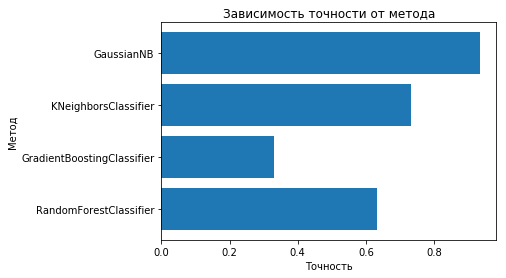

In [49]:
y_pos = np.arange(len(nameModels))

plt.barh(y_pos,acc)
plt.yticks(y_pos, nameModels)
plt.xlabel('Точность')
plt.ylabel('Метод')
plt.title('Зависимость точности от метода')

plt.show()


In [51]:
model = models[3]
model.fit(TRNtrain, TARtrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
max(model.feature_importances_)

In [ ]:
data1